# <p style="font-size:1.3em; color:purple">Solving Deterministic Differential Equation : 1st Order </p><br>

In [1]:
# We start by importing necessary modules. 
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy

# configuring plot
plt.style.use("ggplot")        # ggplot provides a nice theme

# Euler's Method (1st Order Runge - Kutta Method)

If we have an initial value problem (IVP) of the form :
$$
y^\prime = f(t, y), \qquad y(t_0) = y_0
$$

we need to find a solution of above IVP from $t= t_0$ to $t = t_f$. Then we split the time range into smaller steps with a step size '$h$' ($h$ should be reasonably small) and we update y starting from $y_0$ at $t_0$ as follows:
$$
y_{n+1} = y_n + h f(t_n, y_n)
$$

$\textbf{Problem :}$ find the solution to the initial value problem 
$$
y^\prime = 3y -2 \qquad y(0) = 0
$$

$\textbf{Solution :}$ the above equation is a simple 1st order DE, with $f(t,y) = 3y-2$, which we can solve exactly using sympy as follows:

In [49]:
# setting up variables
t = sy.var("t")
y = sy.Function("y")

# defining differential equation
eq = sy.Eq(sy.Derivative(y(t), t), 3*y(t) - 2)

IC = {y(0) : 0}                       # Appliying initial condition
sol = sy.dsolve(eq, y(t), ics=IC)     # Solving DE

sol

Eq(y(t), 2/3 - 2*exp(3*t)/3)

We will use this solution to compare the results. 

Now we are going to define a function called `Euler` . This will take t as an array and 
return the solution y at those values of t.

In [2]:
def f(t, y):
    return 3*y - 2

def Euler(t):
    """
    Solve the differential equation y' = f(t, y)
    input :
        The time array 't'
    output:Solving
        The solution array y
    """
    
    h = t[1] - t[0]         # since t2 - t1 = h, time step
    y = np.zeros_like(t)    # creating a zero array
    y[0] = 0                # initial condition
    
    for n in range(len(t)-1):     # starting iteration
        y[n+1] = y[n] + h * f(t[n], y[n])    # The Euler method
    
    return y

Here, the for loop :
```python
for n in range(len(t)-1):
    y[n+1] = y[n] + h*f(t[n], y[n])
```
is the actual execution of the Euler method. it take $y_n$ and $t_n$ as the $n^{th}$ solution and return solution 
$y_{n+1}$ for the next step

Solving with different time steps:

In [65]:
t0 = 0
tf = 1

t1 = np.arange(t0, tf, 0.1)      # with h = 0.1
y1 = Euler(t1)

t2 = np.arange(t0, tf, 0.01)     # with h = 0.01
y2 = Euler(t2)

t3 = np.arange(t0, tf, 0.001)    # with h = 0.001
y3 = Euler(t3)

def y_true(t):                   # exact soln
    """
    analytical solution obtained by sympy
    """
    
    return (2/3 * (1 - np.exp(3*t)))

t = np.arange(t0, tf, 0.001)
y = y_true(t)

Plotting :

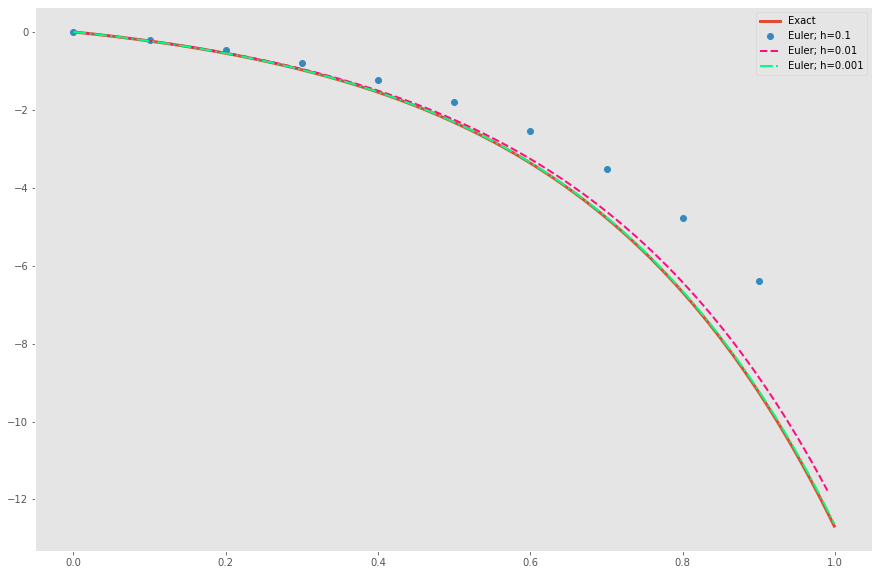

In [72]:
plt.figure(figsize=(15, 10))
plt.plot(t, y, lw=3, label="Exact")
plt.plot(t1, y1, "o", label="Euler; h=0.1")
plt.plot(t2, y2, "--", lw=2, c="#FF0C7E", label="Euler; h=0.01")
plt.plot(t3, y3, "-.", lw=2, c="#00FF7E", label="Euler; h=0.001")

plt.grid()
plt.legend()
plt.show()

# Heun's Method (2nd Order Runge-Kutta Method)

Heun's method is a modification on Euler's methos for solving DE. Here, instead of one step calculation as in Euler's method, there are two steps - The predictor step and the corrector step.
Let's consider the IVP as follows :
$$
y^\prime(t) = f(t, y(t)), \quad y(t_0) = y_0
$$
Using Heun's method, we first calculate the intermediate value $\tilde{y}_{i+1}$ (The predictor step), and then the final approximation $y_{i+1}$ at the next integration point. (The corrector step)

i.e, 

\begin{align}
\tilde{y}_{i+1} &= y_i + h\; f(t_i, y_i) &\text{(Predictor Step)} \\
y_{i+1} &= y_i + \frac{h}{2} \left[f(t_i, y_i) + f(t_{i+1}, \tilde{y}_{i+1})\right] &\text{(Corrector Step)}
\end{align}

Here $h$ is the time step and $t_{i+1} = t_i + h$. 

$\textbf{Problem :}$ Here we use the same problem we did in the first part, i.e, :
$$
y^\prime = 3y -2 \qquad y(0) = 0
$$

$\textbf{Solution :}$ As above, 
$$
f(t, y) = 3y - 2
$$
The implimetation of Heun's method for this problem is as follows:

In [4]:
def f(t, y):
    """
    The derivative function
    """
    return 3*y - 2

In [5]:
def Heun(t):
    """
    Solve the DE of the form dy/dt= f(t, y) 
    using Heun's method. 
    takes time as an array and returns solution y(t) for those values of t
    """
    
    h = t[1] - t[0]          # Time step 
    y = np.zeros_like(t)     # defining y array with same size as t but with all zeros
    y[0] = 0                 # initial condition
    
    for i in range(len(t) -1):
        ypred  = y[i] + h*f(t[i], y[i])     # The predictor step
        y[i+1] = y[i] + (h/2)*(f(t[i], y[i]) + f(t[i+1], ypred))  # The corrector step
    
    return y

Solving with different time steps:

In [6]:
t0 = 0
tf = 1

t1 = np.arange(t0, tf, 0.1)      # with h = 0.1
y1 = Heun(t1)

t2 = np.arange(t0, tf, 0.01)     # with h = 0.01
y2 = Heun(t2)

t3 = np.arange(t0, tf, 0.001)    # with h = 0.001
y3 = Heun(t3)

def y_true(t):                   # exact soln
    """
    analytical solution obtained by sympy
    """
    
    return (2/3 * (1 - np.exp(3*t)))

t = np.arange(t0, tf, 0.001)
y = y_true(t)

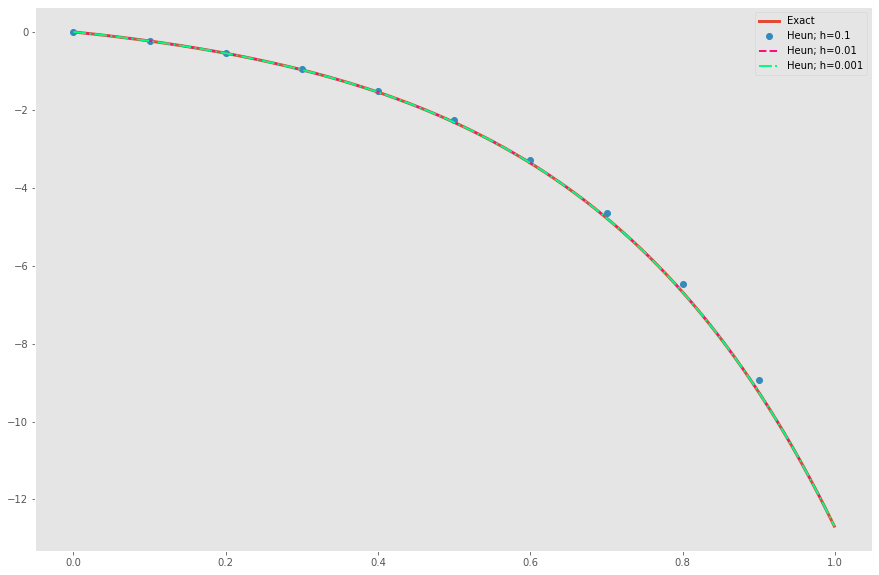

In [7]:
plt.figure(figsize=(15, 10))
plt.plot(t, y, lw=3, label="Exact")
plt.plot(t1, y1, "o", label="Heun; h=0.1")
plt.plot(t2, y2, "--", lw=2, c="#FF0C7E", label="Heun; h=0.01")
plt.plot(t3, y3, "-.", lw=2, c="#00FF7E", label="Heun; h=0.001")

plt.grid()
plt.legend()
plt.show()

Which gives a better convergent for even a small value of h than Euler method.

Ok. Let's compare Heun and Euler method for a fixed time step, say, 0.001, and check how much time they take. 

In [12]:
t_test = np.arange(0, 10, 0.001)

print("Euler's method statistics :")
%timeit Euler(t_test)
print()
print("Heun's method statistics :")
%timeit Heun(t_test)

Euler's method statistics :
18.3 ms ± 170 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Heun's method statistics :
53.3 ms ± 628 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Its clear that Heun's method takes longer time, but gives more meaningfull results.